In [50]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [51]:
company_data=pd.read_csv("Company_Data.csv")

In [52]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [53]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [54]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [55]:
label_encoder = preprocessing.LabelEncoder()
company_data['ShelveLoc']= label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban']= label_encoder.fit_transform(company_data['Urban'])
company_data['US']= label_encoder.fit_transform(company_data['US'])

In [56]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [73]:
x=company_data.drop(["Sales","Urban","US","ShelveLoc"],axis=1)

In [74]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14
396,139,23,3,37,120,55,11
397,162,26,12,368,159,40,18
398,100,79,7,284,95,50,12


In [75]:
sales_val=[]
for value in company_data["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")

In [76]:
y=sales_val

In [77]:
y

['high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'high',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'hig

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [79]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [80]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [106]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7583333333333333

[Text(0.652027027027027, 0.9166666666666666, 'Price <= 131.5\ngini = 0.499\nsamples = 280\nvalue = [147, 133]\nclass = low'),
 Text(0.41216216216216217, 0.75, 'Advertising <= 6.5\ngini = 0.47\nsamples = 214\nvalue = [133, 81]\nclass = low'),
 Text(0.21621621621621623, 0.5833333333333334, 'Price <= 100.5\ngini = 0.499\nsamples = 105\nvalue = [50, 55]\nclass = high'),
 Text(0.10810810810810811, 0.4166666666666667, 'Age <= 67.0\ngini = 0.36\nsamples = 34\nvalue = [26, 8]\nclass = low'),
 Text(0.05405405405405406, 0.25, 'Income <= 25.5\ngini = 0.191\nsamples = 28\nvalue = [25, 3]\nclass = low'),
 Text(0.02702702702702703, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = high'),
 Text(0.08108108108108109, 0.08333333333333333, 'gini = 0.137\nsamples = 27\nvalue = [25, 2]\nclass = low'),
 Text(0.16216216216216217, 0.25, 'Population <= 359.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = high'),
 Text(0.13513513513513514, 0.08333333333333333, 'gini = 0.0\nsamples = 5

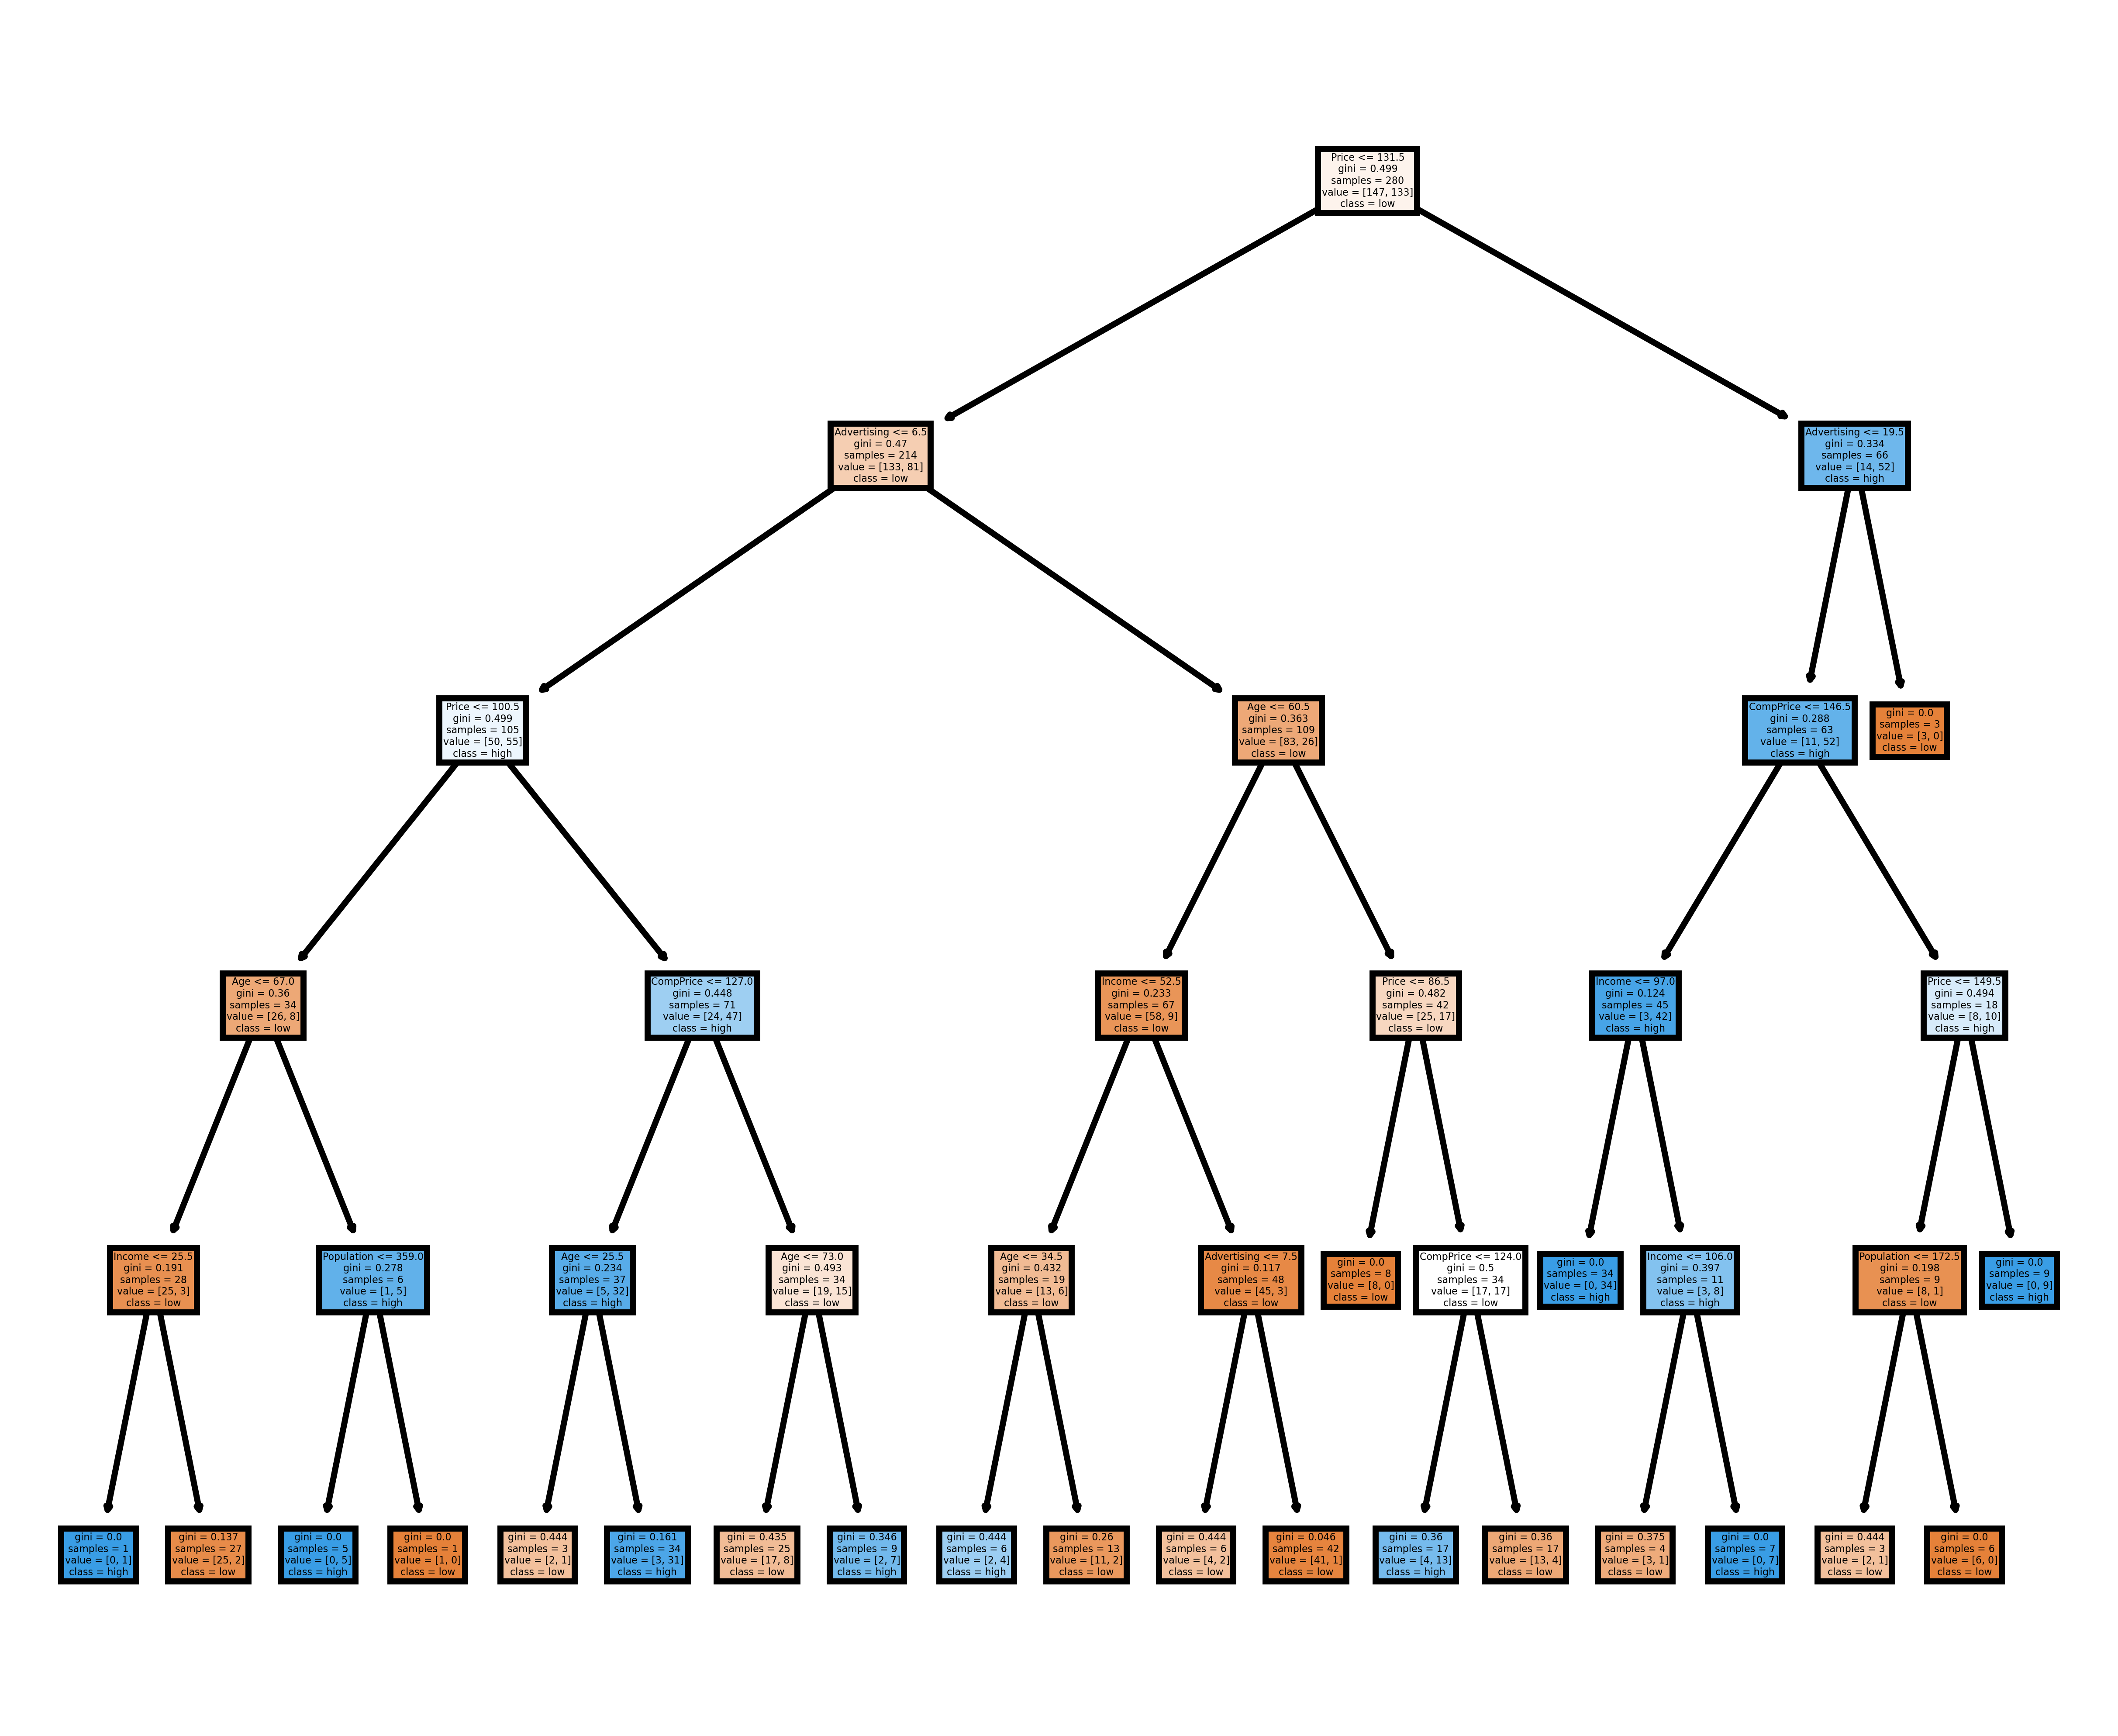

In [105]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education']
cn=['low','high']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize= (6,5),dpi=1000)
tree.plot_tree(model_gini,
               feature_names=fn,
               class_names=cn,
               filled= True)